# Event-Related Potentials

The __P300__ is a common event-related potential reflecting attentional processes. It is called like that because its a positivity approximately peaking after 300 ms. 

It is often assessed in a so-called oddball paradigms, in which participants may be presented with either a frequent non-target stimulus, or an infrequent (or rare) target stimulus, which they must detect and report, e.g. via button press. Often this is done with auditory stimuli, in a protocol called 'auditory oddball'. The infrequent, target stimulus evokes a larger response at around 300 ms than the frequent, non-target stimulus. It is modulated by internal attention. Hence, it can also be used for Brain-Computer-Interfaces. P300 spellers are a type of brain-computer interface (BCI) that use the P300 ERP to enable communication by detecting a user's focus on specific letters or symbols. In a typical setup, a grid of characters flashes in random sequences, and the P300 signal is triggered when the user’s target character lights up. The system then interprets these P300 responses to "spell out" selections, allowing individuals with limited motor abilities to communicate.

In ERP designs, such as the Oddball Task, _epoching_ refers to splitting continuous EEG data into smaller, time-locked segments (epochs) centered around each stimulus onset. Each epoch captures brain activity within a specified time window (e.g., -100 ms to +800 ms) surrounding each event, allowing researchers to analyze the neural response to individual stimuli. The pre-stimulus period in each epoch (e.g., -100 to 0 ms) is used as a _baseline_ to correct for any pre-existing brain activity, making it easier to isolate and analyze the ERP component, such as the P300.

__Example Oddball__

e.g. an example sequence of sounds could be: 'beep'-'beep'-'beep'-'boop'-'beep'...

We have prepared some data from an auditory oddball task which we want to analyze with you.

# ERP Analysis Steps

Here are some standard analysis steps for ERP analysis. We have already done some for you, so that you can already start working right away with epoched data.

1. *Data Preprocessing* (done)  
   This includes average referencing, so the global mean of the signal is 0.

2. *Epoching* (done)  
   The continuous EEG data is segmented into time-locked epochs around each stimulus onset.

3. *Baseline Correction* (done)  
   Baseline adjustment is applied using a pre-stimulus period to reduce variability.

4. *Artifact Rejection* (done)  
   Artifact-laden epochs are removed or corrected to improve ERP signal quality.

5. **Averaging**  
   Average ERPs are computed separately for each condition (target and non-target) and across different channels or channel groups.

6. **P300 Identification**  
   Identify the P300 component by assessing if the maximal difference between target and non-target conditions falls within the 300-400 ms time window.

7. (*Statistical Analysis*)  
   Not required for now.

8. **Plotting the ERPs**  
   Visualize the ERP waveforms for each condition to highlight the P300 response.

9. **Interpretation**  
   Interpret the P300 findings in terms of attentional processes and ERP characteristics across conditions.

In [1]:
# Package Imports
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

# Electrode Positions

Although the spatial resolution of EEG isn't great, electrode position still matters. The following image shows the electrode positions used for data sampling. Additionally, an EOG channel was included to record eye movements. The P300 is primarily assessed in parietocentral channels—could you identify which ones those would be?

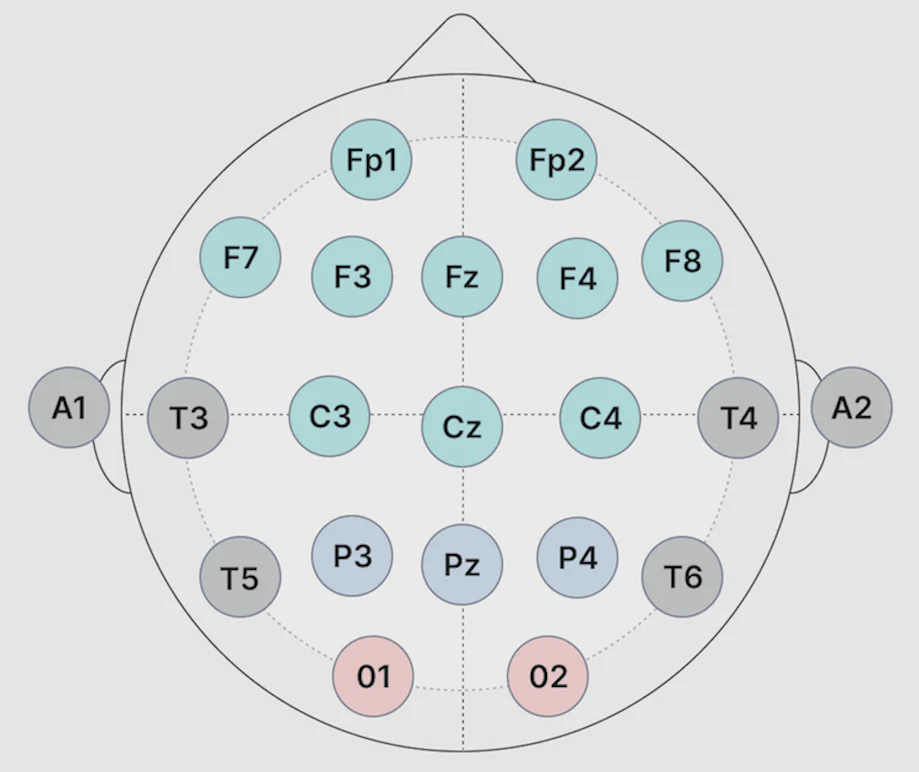

In [2]:
from PIL import Image
from IPython.display import display

pil_img = Image.open('10_20_System.webp')
display(pil_img)

In [3]:
# Data basics
reference = "average"
sfreq = 250 # sampling frequency
tmin  = -0.1 # seconds
tmax  = 1 # seconds
nsamples = int(np.abs(tmin-tmax)*sfreq) + 1
t     = np.linspace(tmin, tmax, nsamples, endpoint = True) # vector of timepoints (for plotting)



In [4]:
# Channel Names, indices, and a dictionary that maps between them
channel_list = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3','P4',
                 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6',
                'Fz', 'Cz', 'Pz', 'A1', 'A2', 'VEOG'] # List of all channel names
channel_idx  = range(len(channel_list))

idx_to_name = dict(zip(channel_idx, channel_list))
name_to_idx = dict(zip(channel_list, channel_idx))

print(idx_to_name)

{0: 'Fp1', 1: 'Fp2', 2: 'F3', 3: 'F4', 4: 'C3', 5: 'C4', 6: 'P3', 7: 'P4', 8: 'O1', 9: 'O2', 10: 'F7', 11: 'F8', 12: 'T3', 13: 'T4', 14: 'T5', 15: 'T6', 16: 'Fz', 17: 'Cz', 18: 'Pz', 19: 'A1', 20: 'A2', 21: 'VEOG'}


In [5]:
# We define a couple of channel groups
parietocentral = ["Pz", "P3", "P4", "Cz", "C3", "C4"]
frontal   = ["Fp1", "Fp2", "F3", "F4", "F7", "F8", "Fz"]
occipital = ["O1", "O2"]


In [6]:
# Loading the data
# We already epoched and denoised the data for you. We can load it as a file into numpy arrays

frequent_data = "data/frequent_data_subj_0.npy"
rare_data     = "data/rare_data_subj_0.npy"

eeg_epoch = {"frequent": None, "rare": None}
eeg_epoch["frequent"] = np.load(frequent_data)
eeg_epoch["rare"]     = np.load(rare_data)



In [7]:
# Explore the data: Which dimension corresponds to channels, times, and epochs, respectively?



## Plotting the P300

To visualize the P300 response, create two subplots: one for the frequent (non-target) stimulus and one for the rare (target) stimulus. For each plot:

1. **Overlay Individual Channel Traces**: Plot responses for each channel, overlaid with the **average across all channels**. What do you see, and what could the reason for that be?
2. **Choose a single parietocentral Channel**: Choose a single channel from the central or parietal group of channel and plot its average, as well as the individual trial traces.

### Advanced Options

1. **Plot Each Channel Group Separately**: Create separate plots for **parietocentral**, **frontal**, and **occipital** channels to see regional variations in the P300 response. You can use the 'idx_to_name' and 'name_to_idx' dictionaries for this.
   
2. **Plot Average per Channel Group**: Show the average response for each subgroup (e.g., parietocentral) to highlight areas with stronger P300 responses.
3. **Identify Peak Difference**: Determine where the difference between target and non-target responses is maximal, usually near the P300 peak (~300 ms), and mark this in the plots.

4. **Add Legends**: Include legends for each channel group to clarify regional contributions. 

_Hint:_ For plotting, it might be necessary to transpose your data, so that it is in the shape time x channels, and not channels x time.


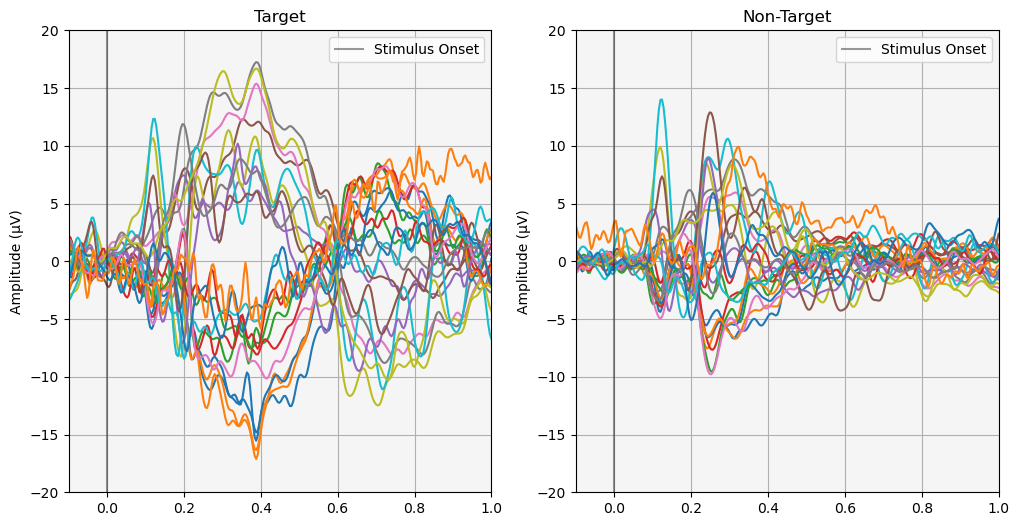

In [8]:
# Simple Plot

v_muv_conversion =  1e+6 # converting from volt to microvolt

target_avg    = eeg_epoch["rare"].mean(axis = 0) * v_muv_conversion # epochs x channels x time
nontarget_avg = eeg_epoch["frequent"].mean(axis = 0) * v_muv_conversion # epochs x channels x time 

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(t, target_avg.T)
axes[0].set_title("Target")
axes[1].plot(t, nontarget_avg.T)
axes[1].set_title("Non-Target")


for ax in axes:
    ax.axvline(0, c = "k", alpha = 0.4, label = "Stimulus Onset")
    ax.set_ylabel("Amplitude (µV)")
    ax.grid(True)
    ax.set_facecolor("whitesmoke")
    ax.set_ylim(-20,20)
    ax.set_xlim(tmin, tmax)
    ax.legend()




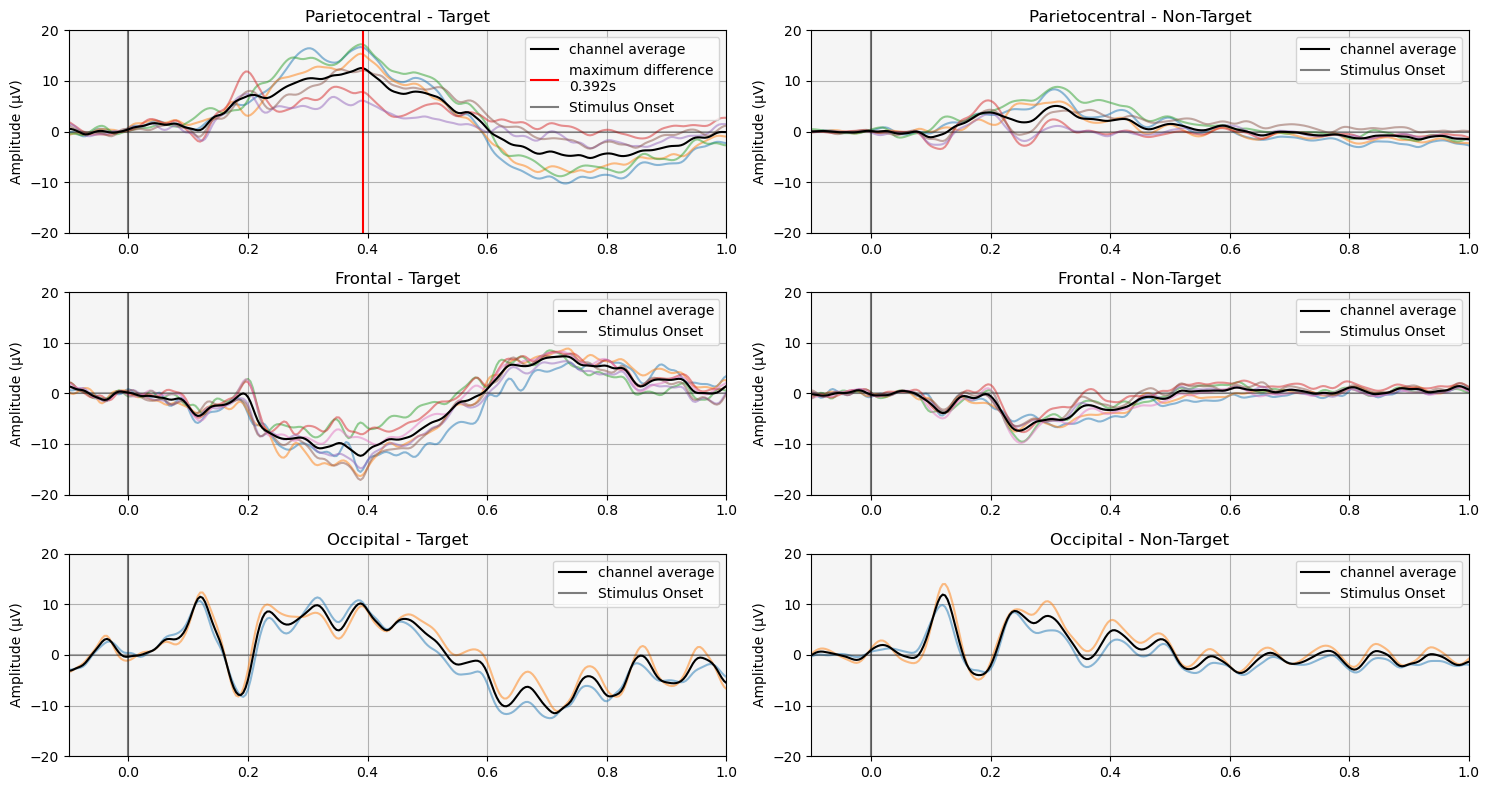

In [9]:
# Advanced Plot

v_muv_conversion =  1e+6 # converting from volt to microvolt

target_avg    = eeg_epoch["rare"].mean(axis = 0) * v_muv_conversion # epochs x channels x time
nontarget_avg = eeg_epoch["frequent"].mean(axis = 0) * v_muv_conversion # epochs x channels x time 

parietal_idx  = [name_to_idx[name] for name in parietocentral]
frontal_idx   = [name_to_idx[name] for name in frontal]
occipital_idx = [name_to_idx[name] for name in occipital]

fig, axes = plt.subplots(3, 2, figsize=(15, 8))
axes = axes.flatten()

target_mean  = target_avg.T[:, parietal_idx].mean(axis = 1)
nontarget_mean  = nontarget_avg.T[:, parietal_idx].mean(axis = 1)
max_diff_idx = np.argmax(np.abs(target_mean - nontarget_mean))
max_diff = t[max_diff_idx]

axes[0].plot(t, target_avg.T[:, parietal_idx], alpha = 0.5)
axes[0].plot(t, target_avg.T[:, parietal_idx].mean(axis = 1), c = "k", label = "channel average")
axes[0].axvline(max_diff, c = "r", label = f"maximum difference\n{max_diff}s")
axes[0].set_title("Parietocentral - Target")
axes[1].plot(t, nontarget_avg.T[:, parietal_idx], alpha = 0.5)
axes[1].plot(t, nontarget_avg.T[:, parietal_idx].mean(axis = 1), c = "k", label = "channel average")
axes[1].set_title("Parietocentral - Non-Target")

axes[2].plot(t, target_avg.T[:, frontal_idx], alpha = 0.5)
axes[2].plot(t, target_avg.T[:, frontal_idx].mean(axis = 1), c = "k", label = "channel average")
axes[2].set_title("Frontal - Target")
axes[3].plot(t, nontarget_avg.T[:, frontal_idx], alpha = 0.5)
axes[3].plot(t, nontarget_avg.T[:, frontal_idx].mean(axis = 1), c = "k", label = "channel average")
axes[3].set_title("Frontal - Non-Target")

axes[4].plot(t, target_avg.T[:, occipital_idx], alpha = 0.5)
axes[4].plot(t, target_avg.T[:, occipital_idx].mean(axis = 1), c = "k", label = "channel average")
axes[4].set_title("Occipital - Target")
axes[5].plot(t, nontarget_avg.T[:, occipital_idx], alpha = 0.5)
axes[5].plot(t, nontarget_avg.T[:, occipital_idx].mean(axis = 1), c = "k", label = "channel average")
axes[5].set_title("Occipital - Non-Target")



for ax in axes:
    ax.axvline(0, c = "k", alpha = 0.5, label = "Stimulus Onset")
    ax.axhline(0, c  ="k", alpha = 0.3)
    ax.set_ylabel("Amplitude (µV)")
    ax.grid(True)
    ax.set_facecolor("whitesmoke")
    ax.set_ylim(-20,20)
    ax.set_xlim(tmin, tmax)
    ax.legend(loc = "upper right")

fig.tight_layout()


## Difference Waves

Another approach to quantify ERPs is the so-called difference wave approach. It is used to emphasize the neurocognitive difference between conditions (e.g., rare vs. frequent stimuli). It involves subtracting the ERP response to the frequent stimulus (non-target) from the ERP response to the rare stimulus (target). This approach helps to isolate the brain's specific response to the target stimulus (P300) by removing the common components shared between the two conditions. However, it also makes the interpretation a bit more challenging. It is useful as an additional representation of the ERPs, but shouldn't be the only one. In the end, difference waves show something that was never really recorded.

In our case, a difference wave makes it easy to see when the (assumed) attention effect of the target stimulus was maximal, and how it is temporally located.

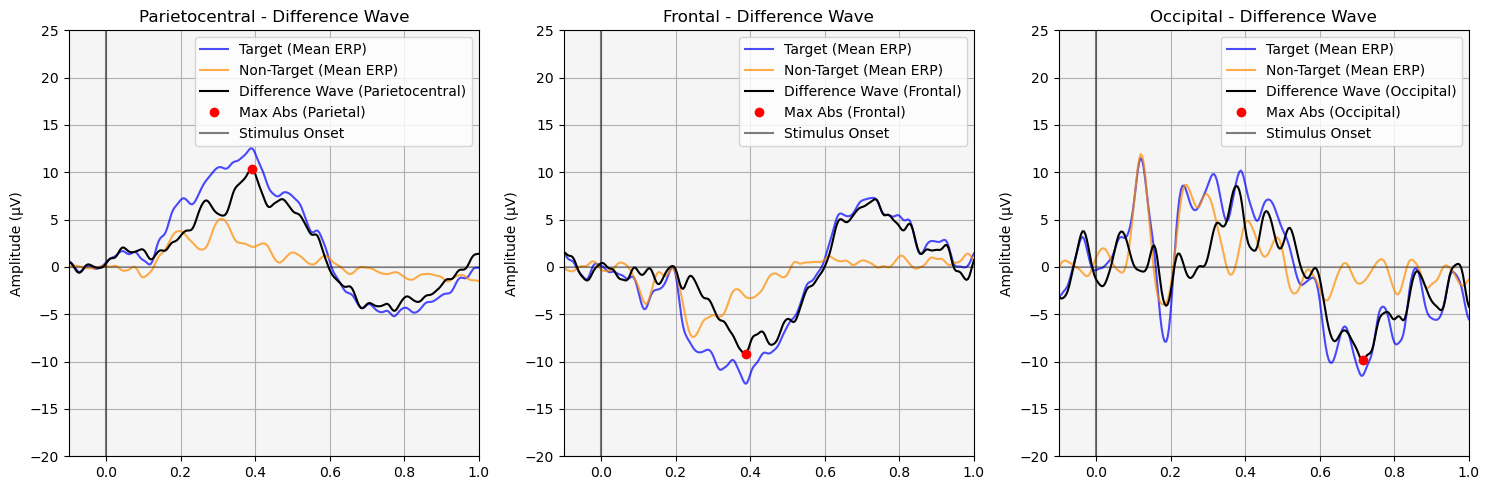

In [10]:
# Conversion from volts to microvolts
v_muv_conversion =  1e+6

# Calculate average target (rare) and non-target (frequent) ERPs
target_avg = eeg_epoch["rare"].mean(axis=0) * v_muv_conversion  # epochs x channels x time
nontarget_avg = eeg_epoch["frequent"].mean(axis=0) * v_muv_conversion  # epochs x channels x time

# Define the indices for the different channel groups
parietal_idx = [name_to_idx[name] for name in parietocentral]
frontal_idx = [name_to_idx[name] for name in frontal]
occipital_idx = [name_to_idx[name] for name in occipital]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Calculate the difference wave for parietal, frontal, and occipital regions
# Parietal region difference wave
parietal_target = target_avg.T[:, parietal_idx]
parietal_nontarget = nontarget_avg.T[:, parietal_idx]
parietal_diff = np.mean(parietal_target, axis=1) - np.mean(parietal_nontarget, axis=1)

# Frontal region difference wave
frontal_target = target_avg.T[:, frontal_idx]
frontal_nontarget = nontarget_avg.T[:, frontal_idx]
frontal_diff = np.mean(frontal_target, axis=1) - np.mean(frontal_nontarget, axis=1)

# Occipital region difference wave
occipital_target = target_avg.T[:, occipital_idx]
occipital_nontarget = nontarget_avg.T[:, occipital_idx]
occipital_diff = np.mean(occipital_target, axis=1) - np.mean(occipital_nontarget, axis=1)

# Plot underlying signal means (target and non-target ERPs) and difference wave for each region
# Parietal region plot
axes[0].plot(t, np.mean(parietal_target, axis=1), color='blue', alpha=0.7, label="Target (Mean ERP)")
axes[0].plot(t, np.mean(parietal_nontarget, axis=1), color='darkorange', alpha=0.7, label="Non-Target (Mean ERP)")
axes[0].plot(t, parietal_diff, color='k', label="Difference Wave (Parietocentral)")

# Marker for max abs value
max_parietal_idx = np.argmax(np.abs(parietal_diff))
axes[0].plot(t[max_parietal_idx], parietal_diff[max_parietal_idx], 'ro', label="Max Abs (Parietal)")

axes[0].set_title("Parietocentral - Difference Wave")

# Frontal region plot
axes[1].plot(t, np.mean(frontal_target, axis=1), color='blue', alpha=0.7, label="Target (Mean ERP)")
axes[1].plot(t, np.mean(frontal_nontarget, axis=1), color='darkorange', alpha=0.7, label="Non-Target (Mean ERP)")
axes[1].plot(t, frontal_diff, color='k', label="Difference Wave (Frontal)")

# Marker for max abs value
max_frontal_idx = np.argmax(np.abs(frontal_diff))
axes[1].plot(t[max_frontal_idx], frontal_diff[max_frontal_idx], 'ro', label="Max Abs (Frontal)")

axes[1].set_title("Frontal - Difference Wave")

# Occipital region plot
axes[2].plot(t, np.mean(occipital_target, axis=1), color='blue', alpha=0.7, label="Target (Mean ERP)")
axes[2].plot(t, np.mean(occipital_nontarget, axis=1), color='darkorange', alpha=0.7, label="Non-Target (Mean ERP)")
axes[2].plot(t, occipital_diff, color='k', label="Difference Wave (Occipital)")

# Marker for max abs value
max_occipital_idx = np.argmax(np.abs(occipital_diff))
axes[2].plot(t[max_occipital_idx], occipital_diff[max_occipital_idx], 'ro', label="Max Abs (Occipital)")

axes[2].set_title("Occipital - Difference Wave")

# Add vertical lines, labels, and formatting
for ax in axes:
    ax.axvline(0, c="k", alpha=0.5, label="Stimulus Onset")
    ax.axhline(0, c="k", alpha=0.3)
    ax.set_ylabel("Amplitude (µV)")
    ax.grid(True)
    ax.set_facecolor("whitesmoke")
    ax.set_ylim(-20, 25)  # Adjust y-limits as necessary
    ax.set_xlim(tmin, tmax)  # Adjust x-limits based on the time window of interest
    ax.legend(loc="upper right")

fig.tight_layout()
plt.show()


# Statistical Test

A statistical test in ERP analysis is used to determine whether differences in ERP responses between conditions (e.g., target vs. non-target stimuli) are significant or could have occurred by chance. In this case, a paired t-test is chosen because it compares two related samples, such as ERP responses from the same participants in two conditions. By focusing on a specific electrode (e.g., Pz) and a time window (e.g., 300–400 ms), we can evaluate the P300 component, which is expected to be more pronounced for target stimuli. The test calculates a t-statistic that reflects the size of the difference relative to its variability, and a p-value that indicates the probability of observing this difference if no true difference exists. A low p-value (typically < 0.05) suggests that the observed differences are statistically significant and likely reflect real changes in brain activity associated with the conditions.

For this example, we use the Pz electrode, but feel free to test this for any other electrode!

In [11]:
from scipy.stats import ttest_rel

channel_idx = name_to_idx["Pz"]
v_muv_conversion = 1e6  
channel_idx = 10  # Index for the Pz channel in the numpy array
time_window = (0.3, 0.4)  # Time window in s

target_pz = eeg_epoch["rare"][:, channel_idx, :] * v_muv_conversion  # target (rare) epochs x time
nontarget_pz = eeg_epoch["frequent"][:, channel_idx, :] * v_muv_conversion  # non-target (frequent) epochs x time

# Find the indices for the specified time window 
time_indices = (time_window[0] <= t) & (t <= time_window[1])

target_mean_pz = target_pz[:, time_indices].mean(axis=0)
nontarget_mean_pz = nontarget_pz[:, time_indices].mean(axis=0)

t_stat, p_value = ttest_rel(target_mean_pz, nontarget_mean_pz)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -18.760386454673732, P-value: 3.041353169381049e-16
